In [77]:
from toggle_equations import toggle_rhs
from attractor_stats import *
from steady_states import *
from sim_funcs import *
from plotting_funcs import *

from collections import OrderedDict,Counter
#from networkx.drawing.nx_agraph import to_agraph
from matplotlib import rc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import networkx as nx
import copy

%matplotlib inline
sns.set(style='white', context='notebook', 
        palette='muted', rc={'axes.labelsize': 16})

plt.rc('font', size=15) #controls default text size


# Parameters for Euler-Marayama simulation

In [64]:
alpha1_A = 0.3
alpha2_A = 0.8
alpha1_AB = 0.3
alpha2_AB = 0.3
alpha1_B = 0.8
alpha2_B = 0.3

myPara = [[0.3,0.8], [0.3,0.3], [0.8,0.3]]
a = 0.6 
c = 0.6
b = 0.4
d = 0.4
max1 = 1
max2 = 1
lambda1 = 1.25
lambda2 = 1.25
omega = 50
dt = .01  # Time step.
T = 100  # Total time.
n_traj = 1000
x_init = 0.6
y_init = 0.6
tolerance = 1e-8

#For plotting
n = int(T / dt)
t = np.linspace(0., T, n)  # Vector of times.
ss_colors = ['#38CAFF', '#ff9400', '#99dd44'] # Since we have a maximum of 3 attractors (stable ss)
ss_unstable_colors = ['#ed1c24', '#fe6dbc', '#fca085'] 


# Running EM simulations

In [65]:
em_traj_A = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_A, alpha2_A, a, c, b, d, max1, max2, lambda1, lambda2, omega, seed = 20)
em_traj_AB = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_AB, alpha2_AB, a, c, b, d, max1, max2, lambda1, lambda2, omega, seed = 20)
em_traj_B = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_B, alpha2_B, a, c, b, d, max1, max2, lambda1, lambda2, omega, seed = 20)


In [8]:
em_traj_10 = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_A, alpha2_A, a, c, b, d, max1, max2, lambda1, lambda2, omega = 10, seed = 20)
em_traj_100 = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_A, alpha2_A, a, c, b, d, max1, max2, lambda1, lambda2, omega = 100, seed = 20)
em_traj_1000 = em_cle(n_traj, x_init, y_init, tolerance, dt , T, alpha1_A, alpha2_A, a, c, b, d, max1, max2, lambda1, lambda2, omega = 1000, seed = 20)


In [9]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    

In [30]:
import matplotlib.collections as mcoll

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=None,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments


(0, 2)

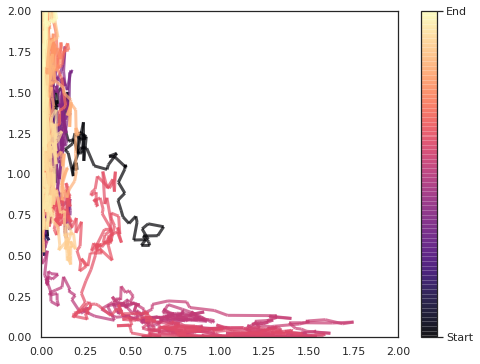

In [39]:
start = 0
end = 10000
sample = 1
path_id = 5

x = em_traj_10[path_id][0][start:end:2] 
y = em_traj_10[path_id][1][start:end:2]
fig, ax = plt.subplots(figsize = (8,6))

lc = colorline(x, y, cmap=plt.cm.magma, alpha = 0.7)
cbar = plt.colorbar(lc, ticks=[0, 1])
cbar.ax.set_yticklabels(['Start', 'End'])
ax.set_xlim([0,2])
ax.set_ylim([0,2])


In [34]:
em_traj_10.shape

(10, 2, 10000)

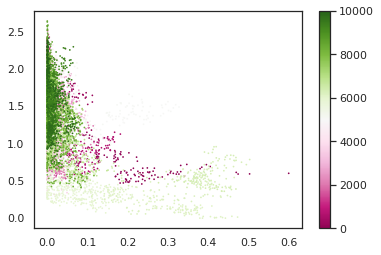

In [27]:
time_start= 0
time_max = 10000
path_id =  9
diverging_time = time_max/2

plt.scatter(em_traj_10[path_id][0][time_start:time_max], em_traj_10[path_id][1][time_start:time_max], c = range(n), norm=MidpointNormalize(midpoint=diverging_time,vmin=time_start, vmax=time_max), cmap=plt.cm.PiYG, linewidths=0, marker='o', s=3)
plt.colorbar()

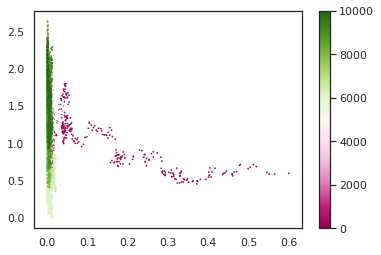

In [28]:
plt.scatter(em_traj_100[path_id][0][time_start:time_max], em_traj_10[path_id][1][time_start:time_max], c = range(n), norm=MidpointNormalize(midpoint=diverging_time,vmin=time_start, vmax=time_max), cmap=plt.cm.PiYG, linewidths=0, marker='o', s=3)
plt.colorbar()

## Plot -  EM trajectories (10 trajectories)

The bolded black line represents the gene expression level of an 'averaged' path.

Text(0, 0.5, 'y')

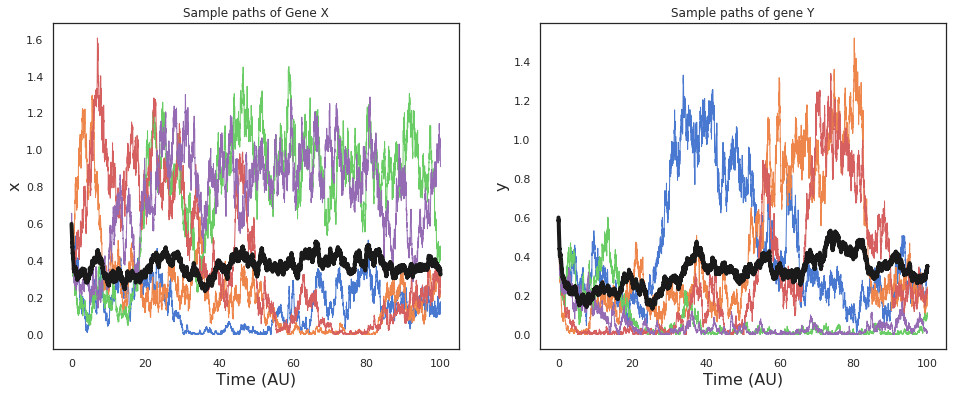

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
ax0, ax1 = axes.flatten()

for i in range(n_traj-5):
    ax0.plot(t,em_traj_AB[i][0][:], lw=1)
    ax1.plot(t,em_traj_AB[i][1][:], lw=1)
ax0.plot(t, em_traj_AB[:,0,:].mean(axis=0), '-', lw=4, 
           color="k")
ax1.plot(t, em_traj_AB[:,1,:].mean(axis=0), '-', lw=4, 
           color="k")
ax0.set_title("Sample paths of Gene X")
ax1.set_title("Sample paths of gene Y")
ax0.set_xlabel('Time (AU)')
ax1.set_xlabel('Time (AU)')
ax0.set_ylabel('x')
ax1.set_ylabel('y')

#ax2.scatter(x_interpolate, y_interpolate, c = range(n * k), cmap=plt.cm.jet, linewidths=0, marker='o', s=3)
#ax2.set_title("Phase portrait of X and Y with simulated trajectory")


# Attractor statistics for stochastic paths

## Parameters

In [66]:
dist_entry_x = dist_entry_y = 0.1
dist_exit_x = dist_exit_y = 0.4
myPara =[[0.3,0.8],[0.3,0.3],[0.8,0.3]]  #Alpha1 and Alpha2 parameter values for EM_traj A,AB,B respectively.


## Steady states and classifying stability

In [67]:
path_colors = [[] for i in range(len(myPara))]
x_coordinate_ss, y_coordinate_ss = steady_states (alpha1_A, alpha2_A, a, c, b, d, lambda1, lambda2, myPara)
stable_steady_states, unstable_steady_states = stability (alpha1_A, alpha2_A, a, c, b, d, lambda1, lambda2, x_coordinate_ss, y_coordinate_ss)
grouped_stable_ss, grouped_unstable_ss = group_steady_states(stable_steady_states, unstable_steady_states, myPara)

x_coordinate_ss_A, y_coordinate_ss_A = steady_states (alpha1_A, alpha2_A, a, c, b, d, lambda1, lambda2)
stable_steady_states_A, unstable_steady_states_A = stability (alpha1_A, alpha2_A, a, c, b, d, lambda1, lambda2, x_coordinate_ss_A, y_coordinate_ss_A)

x_coordinate_ss_AB, y_coordinate_ss_AB = steady_states (alpha1_AB, alpha2_AB, a, c, b, d, lambda1, lambda2)
stable_steady_states_AB, unstable_steady_states_AB = stability (alpha1_AB, alpha2_AB, a, c, b, d, lambda1, lambda2, x_coordinate_ss_AB, y_coordinate_ss_AB)

x_coordinate_ss_B, y_coordinate_ss_B = steady_states (alpha1_B, alpha2_B, a, c, b, d, lambda1, lambda2)
stable_steady_states_B, unstable_steady_states_B = stability (alpha1_B, alpha2_B, a, c, b, d, lambda1, lambda2, x_coordinate_ss_B, y_coordinate_ss_B)


/home/porcupine/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [68]:
switching_A = switch_times(em_traj_A, dist_entry_x, dist_entry_y, dist_exit_x, dist_exit_y, stable_steady_states_A)
switching_AB = switch_times(em_traj_AB, dist_entry_x, dist_entry_y, dist_exit_x, dist_exit_y, stable_steady_states_AB)
switching_B = switch_times(em_traj_B, dist_entry_x, dist_entry_y, dist_exit_x, dist_exit_y, stable_steady_states_B)

0/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
1/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
2/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
3/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
4/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
5/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
6/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
7/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
8/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with mu

80/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
81/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
82/1000
83/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
84/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
85/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
86/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
87/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
88/1000
Fe_coord at 

166/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
167/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
168/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
169/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
170/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
171/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
172/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
173/1000
174/1000
175/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
176/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take t

249/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
250/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
251/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
252/1000
253/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
254/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
255/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
256/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
257/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
258/1000
259/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take t

326/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
327/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
328/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
329/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
330/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
331/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
332/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
333/1000
Fp_coord at 0

405/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
406/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
407/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
408/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
409/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
410/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
411/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
412/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
413/1000
Fe

492/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
493/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
494/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
495/1000
496/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
497/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
498/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
499/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
500/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
501

565/1000
566/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
567/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
568/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
569/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
570/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
571/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
572/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
573/1000
Fp_c

Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
643/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
644/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
645/1000
646/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
647/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
648/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
649/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
650/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
651/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
652/1000
653/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take 

725/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
726/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
727/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
728/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
729/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
730/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
731/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
732/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 

801/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
802/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
803/1000
804/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
805/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
806/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
807/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
808/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
809/1000
Fp_c

878/1000
879/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
880/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
881/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
882/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
883/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
884/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
885/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 

963/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
964/1000
965/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
966/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
967/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
968/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
969/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
970/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
971/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
972/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
973/1000
974/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time

Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
201/1000
202/1000
203/1000
204/1000
205/1000
206/1000
207/1000
208/1000
209/1000
210/1000
211/1000
212/1000
213/1000
214/1000
215/1000
216/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
217/1000
218/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
219/1000
220/1000
221/1000
222/1000
223/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
224/1000
225/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
226/1000
227/1000
228/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with

533/1000
534/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
535/1000
536/1000
537/1000
538/1000
539/1000
540/1000
541/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
542/1000
543/1000
544/1000
545/1000
546/1000
547/1000
548/1000
549/1000
550/1000
551/1000
552/1000
553/1000
554/1000
555/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
556/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
557/1000
558/1000
559/1000
560/1000
561/1000
562/1000
563/1000
564/1000
565/1000
566/1000
567/1000
568/1000
569/1000
570/1000
571/1000
572/1000
573/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
574/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
575/1000
576/1000
577/1000
578/1000
Fp_coord at 0 with multiple identica

874/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
875/1000
876/1000
877/1000
878/1000
879/1000
880/1000
881/1000
882/1000
883/1000
884/1000
885/1000
886/1000
887/1000
888/1000
889/1000
890/1000
891/1000
892/1000
893/1000
894/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
895/1000
896/1000
897/1000
898/1000
899/1000
900/1000
901/1000
902/1000
Fe_coord at 0 with multiple identical coordinates.
Adjusted fe time to take the last value
903/1000
904/1000
905/1000
906/1000
907/1000
908/1000
909/1000
910/1000
911/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_time to take the first value
912/1000
913/1000
914/1000
915/1000
916/1000
917/1000
918/1000
919/1000
920/1000
921/1000
922/1000
923/1000
924/1000
925/1000
926/1000
Fp_coord at 0 with multiple identical coordinates.
Adjusted fp_ti

616/1000
617/1000
618/1000
619/1000
620/1000
621/1000
622/1000
623/1000
624/1000
625/1000
626/1000
627/1000
628/1000
629/1000
630/1000
631/1000
632/1000
633/1000
634/1000
635/1000
636/1000
637/1000
638/1000
639/1000
640/1000
641/1000
642/1000
643/1000
644/1000
645/1000
646/1000
647/1000
648/1000
649/1000
650/1000
651/1000
652/1000
653/1000
654/1000
655/1000
656/1000
657/1000
658/1000
659/1000
660/1000
661/1000
662/1000
663/1000
664/1000
665/1000
666/1000
667/1000
668/1000
669/1000
670/1000
671/1000
672/1000
673/1000
674/1000
675/1000
676/1000
677/1000
678/1000
679/1000
680/1000
681/1000
682/1000
683/1000
684/1000
685/1000
686/1000
687/1000
688/1000
689/1000
690/1000
691/1000
692/1000
693/1000
694/1000
695/1000
696/1000
697/1000
698/1000
699/1000
700/1000
701/1000
702/1000
703/1000
704/1000
705/1000
706/1000
707/1000
708/1000
709/1000
710/1000
711/1000
712/1000
713/1000
714/1000
715/1000
716/1000
717/1000
718/1000
719/1000
720/1000
721/1000
722/1000
723/1000
724/1000
725/1000
726/1000
7

In [69]:
entry_times_A, attractor_indices_A, transition_mat_A, counts_A = switch_stats(switching_A, stable_steady_states_A)
entry_times_AB, attractor_indices_AB, transition_mat_AB, counts_AB = switch_stats(switching_AB, stable_steady_states_AB)
entry_times_B, attractor_indices_B, transition_mat_B, counts_B = switch_stats(switching_B, stable_steady_states_B)

0/1000
1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37/1000
38/1000
39/1000
40/1000
41/1000
42/1000
43/1000
44/1000
45/1000
46/1000
47/1000
48/1000
49/1000
50/1000
51/1000
52/1000
53/1000
54/1000
55/1000
56/1000
57/1000
58/1000
59/1000
60/1000
61/1000
62/1000
63/1000
64/1000
65/1000
66/1000
67/1000
68/1000
69/1000
70/1000
71/1000
72/1000
73/1000
74/1000
75/1000
76/1000
77/1000
78/1000
79/1000
80/1000
81/1000
82/1000
83/1000
84/1000
85/1000
86/1000
87/1000
88/1000
89/1000
90/1000
91/1000
92/1000
93/1000
94/1000
95/1000
96/1000
97/1000
98/1000
99/1000
100/1000
101/1000
102/1000
103/1000
104/1000
105/1000
106/1000
107/1000
108/1000
109/1000
110/1000
111/1000
112/1000
113/1000
114/1000
115/1000
116/1000
117/1000
118/1000
119/1000
120/1000
121/1000
122/1000
123

426/1000
427/1000
428/1000
429/1000
430/1000
431/1000
432/1000
433/1000
434/1000
435/1000
436/1000
437/1000
438/1000
439/1000
440/1000
441/1000
442/1000
443/1000
444/1000
445/1000
446/1000
447/1000
448/1000
449/1000
450/1000
451/1000
452/1000
453/1000
454/1000
455/1000
456/1000
457/1000
458/1000
459/1000
460/1000
461/1000
462/1000
463/1000
464/1000
465/1000
466/1000
467/1000
468/1000
469/1000
470/1000
471/1000
472/1000
473/1000
474/1000
475/1000
476/1000
477/1000
478/1000
479/1000
480/1000
481/1000
482/1000
483/1000
484/1000
485/1000
486/1000
487/1000
488/1000
489/1000
490/1000
491/1000
492/1000
493/1000
494/1000
495/1000
496/1000
497/1000
498/1000
499/1000
500/1000
501/1000
502/1000
503/1000
504/1000
505/1000
506/1000
507/1000
508/1000
509/1000
510/1000
511/1000
512/1000
513/1000
514/1000
515/1000
516/1000
517/1000
518/1000
519/1000
520/1000
521/1000
522/1000
523/1000
524/1000
525/1000
526/1000
527/1000
528/1000
529/1000
530/1000
531/1000
532/1000
533/1000
534/1000
535/1000
536/1000
5

In [70]:
final_attractors_A = final_attractor(em_traj_A, dist_exit_x, dist_exit_y, stable_steady_states_A)
final_attractors_AB = final_attractor(em_traj_AB, dist_exit_x, dist_exit_y, stable_steady_states_AB)
final_attractors_B = final_attractor(em_traj_B, dist_exit_x, dist_exit_y, stable_steady_states_B)

In [92]:
em_traj_A.shape

(1000, 2, 10000)

In [71]:
last_1000_A = em_traj_A[:,:,-100:]
last_1000_AB = em_traj_AB[:,:,-100:]
last_1000_B = em_traj_B[:,:,-100:]

In [72]:
x_vals_A = last_1000_A[:,0,:].flatten()
y_vals_A = last_1000_A[:,1,:].flatten()
x_vals_AB = last_1000_AB[:,0,:].flatten()
y_vals_AB = last_1000_AB[:,1,:].flatten()
x_vals_B = last_1000_B[:,0,:].flatten()
y_vals_B = last_1000_B[:,1,:].flatten()

In [73]:
traj_hm_A = pd.DataFrame({"x" : x_vals_A, "y" : y_vals_A})
traj_hm_AB = pd.DataFrame({"x" : x_vals_AB, "y" : y_vals_AB})
traj_hm_B = pd.DataFrame({"x" : x_vals_B, "y" : y_vals_B})

In [74]:
final_attractors = [final_attractors_A, final_attractors_AB, final_attractors_B]
stable_steady_states = [stable_steady_states_A, stable_steady_states_AB, stable_steady_states_B]
stable_steady_states = np.array([np.array(xi) for xi in stable_steady_states])
unstable_steady_states = [unstable_steady_states_A, unstable_steady_states_AB, unstable_steady_states_B]
unstable_steady_states = np.array([np.array(xi) for xi in unstable_steady_states])
traj_hm = [traj_hm_A, traj_hm_AB, traj_hm_B]


In [82]:
traj_hm_A.shape

(100000, 2)

## Plot - Density of final attractors with inset attractor counts

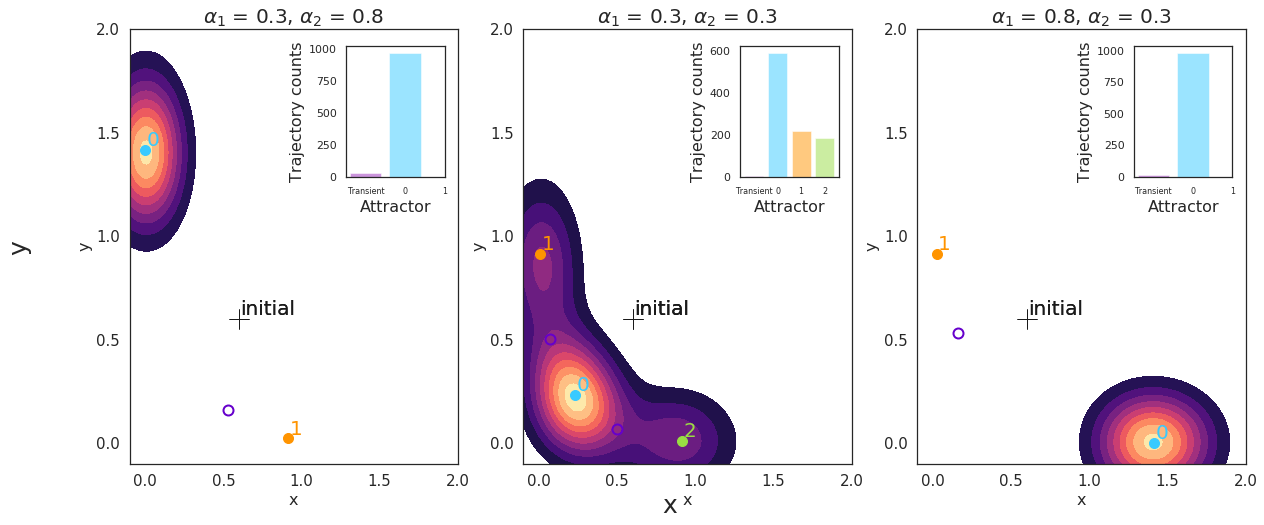

In [96]:
num_para = 1
fig, ax = plt.subplots(1, 3, figsize=(20,8))
plt.rcParams.update({'font.size':20})
fig.text(0.5, 0.04, 'x', ha ='center', fontsize = 25)
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical', fontsize = 25)

for i in range(3):
    ax[i].set_xlim([-0.1,2])
    ax[i].set_ylim([-0.1,2])
    ax[i].set_xticks(np.arange(0, 2.5, 0.5))
    ax[i].set_yticks(np.arange(0, 2.5, 0.5))
    
    x_ss_stable = stable_steady_states[i][:,0][:,2]
    y_ss_stable = stable_steady_states[i][:,1][:,2]
    for ss_index in range(len(x_ss_stable)):
        ax[i].plot(x_ss_stable[ss_index], y_ss_stable[ss_index], '.', color = ss_colors[ss_index], markersize= 20 )
        ax[i].plot(x_init, y_init, '+', color = 'k', markersize= 20 )
        ax[i].annotate('{}'.format(ss_index), xy=(stable_steady_states[i][ss_index][0][2], stable_steady_states[i][ss_index][1][2]),  xycoords='data',
            xytext=(stable_steady_states[i][ss_index][0][2] + 0.01, stable_steady_states[i][ss_index][1][2] + 0.02), color = ss_colors[ss_index])
        ax[i].annotate('initial', xy=(x_init, y_init),  xycoords='data',
            xytext=(x_init + 0.01, y_init + 0.02), color = 'k')
        ax[i].tick_params(axis='both', which='major', labelsize=15)
    unstable_index = np.array([x for x in range(len(grouped_unstable_ss)) if grouped_unstable_ss[x].any() and (myPara[i][0] == grouped_unstable_ss[x][:,0][:,0][0] and myPara[i][1] == grouped_unstable_ss[x][:,0][:,1][0])])
    if unstable_index.size>0: 
        x_ss_unstable = grouped_unstable_ss[unstable_index[0]][:,0][:,2]
        y_ss_unstable = grouped_unstable_ss[unstable_index[0]][:,1][:,2]
        for ss_index in range(len(x_ss_unstable)):
            ax[i].plot(x_ss_unstable[ss_index], y_ss_unstable[ss_index], '.', color = "#6600cc", mfc='none',markeredgewidth = 2, markersize= 20 )
    
    ax[i].set_title("{} = {}, {} = {}".format(r'$\alpha_{1}$', stable_steady_states[i][:,0][0][0], r'$\alpha_{2}$',stable_steady_states[i][:,0][0][1]), fontsize = 20)
    ins = ax[i].inset_axes([0.66,0.66,0.3,0.3])
    attractor_count_dict = OrderedDict(sorted(Counter(final_attractors[i]).items(), key=lambda t: t[0]))
    barplot_col = ['#992DBA', '#38CAFF', '#ff9400', '#99dd44']
    ins.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5, color = barplot_col)
    ins.set_ylabel('Trajectory counts')
    ins.set_xlabel('Attractor')
    ins.set_xticks(np.arange(-1, len(x_ss_stable),1))#ax.plot.xticks([-1,0,1,2])
    labels = ins.get_xticks().tolist()
    labels[0] = "Transient"
    ins.set_xticklabels(labels, fontsize = 8 )

sns.kdeplot(traj_hm_A.x, traj_hm_A.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax[0], shade_lowest = False)
sns.kdeplot(traj_hm_AB.x, traj_hm_AB.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax[1], shade_lowest = False)
sns.kdeplot(traj_hm_B.x, traj_hm_B.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax[2], shade_lowest = False)

#fig.savefig('plots_stochastic/01_density_insets.png', bbox_inches='tight')
